## Loading data into a suitable format

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', 500)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap

In [4]:
ccgs=[
    'E38000042',
    'E38000157',
    'E38000168',
    'E38000107',
    'E38000117',
    'E38000012'
]

In [9]:
megatraining = pd.read_csv("MegaTraining.csv")

[0.08406497 0.24319106 0.39228105 0.05502452 0.2254384 ]


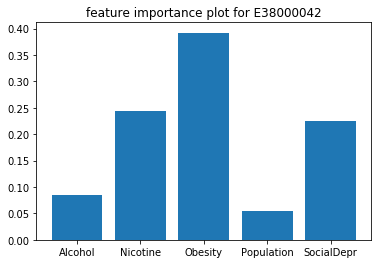

[0.06200955 0.08024589 0.04259209 0.01178541 0.80336707]


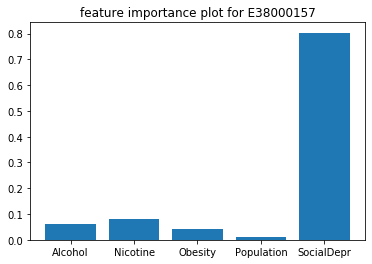

[0.00523718 0.00662414 0.01164526 0.08701361 0.8894798 ]


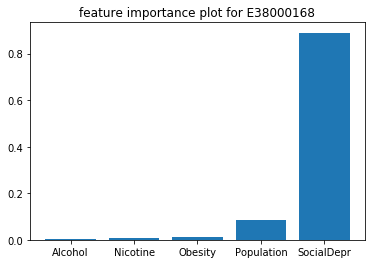

[0.20371138 0.01238709 0.07988227 0.03880576 0.6652135 ]


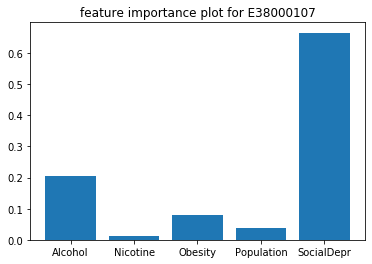

[0.04015911 0.06842579 0.0624833  0.12460833 0.70432348]


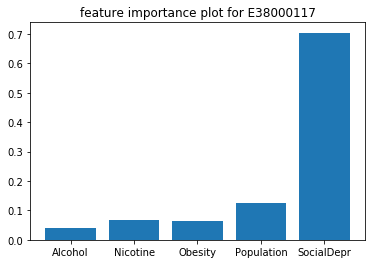

IndexError: index 0 is out of bounds for axis 0 with size 0

In [20]:
for ccg in ccgs:
    index_input=megatraining[megatraining['Unnamed: 0']==ccg].index[0]
    one_lag_model_explain(index_input)
    

In [158]:
index=0

In [67]:

test=megatraining.iloc[0]
test=test.to_frame().transpose()


In [68]:
test=test.to_frame().transpose()

In [71]:
test

,Unnamed: 0,Alcohol.2016-10-01,Alcohol.2016-11-01,Alcohol.2016-12-01,Alcohol.2017-01-01,Alcohol.2017-02-01,Alcohol.2017-03-01,Alcohol.2017-04-01,Alcohol.2017-05-01,Alcohol.2017-06-01,Alcohol.2017-07-01,Alcohol.2017-08-01,Alcohol.2017-09-01,Alcohol.2017-10-01,Alcohol.2017-11-01,Alcohol.2017-12-01,Alcohol.2018-01-01,Alcohol.2018-02-01,Alcohol.2018-03-01,Alcohol.2018-04-01,Alcohol.2018-05-01,Alcohol.2018-06-01,Alcohol.2018-07-01,Alcohol.2018-08-01,Alcohol.2018-09-01,Alcohol.2018-10-01,Alcohol.2018-11-01,Alcohol.2018-12-01,Alcohol.2019-01-01,Nicotine.2016-09-01,Nicotine.2016-10-01,Nicotine.2016-11-01,Nicotine.2016-12-01,Nicotine.2017-01-01,Nicotine.2017-02-01,Nicotine.2017-03-01,Nicotine.2017-04-01,Nicotine.2017-05-01,Nicotine.2017-06-01,Nicotine.2017-07-01,Nicotine.2017-08-01,Nicotine.2017-09-01,Nicotine.2017-10-01,Nicotine.2017-11-01,Nicotine.2017-12-01,Nicotine.2018-01-01,Nicotine.2018-02-01,Nicotine.2018-03-01,Nicotine.2018-04-01,Nicotine.2018-05-01,Nicotine.2018-06-01,Nicotine.2018-07-01,Nicotine.2018-08-01,Opioid.2016-08-01,Opioid.2016-09-01,Opioid.2016-10-01,Opioid.2016-11-01,Opioid.2016-12-01,Opioid.2017-01-01,Opioid.2017-02-01,Opioid.2017-03-01,Opioid.2017-04-01,Opioid.2017-05-01,Opioid.2017-06-01,Opioid.2017-07-01,Opioid.2017-08-01,Opioid.2017-09-01,Opioid.2017-10-01,Opioid.2017-11-01,Opioid.2017-12-01,Opioid.2018-01-01,Opioid.2018-02-01,Opioid.2018-03-01,Opioid.2018-04-01,Opioid.2018-05-01,Opioid.2018-06-01,Opioid.2018-07-01,Opioid.2018-08-01,Opioid.2018-09-01,Opioid.2018-10-01,Opioid.2018-11-01,Opioid.2018-12-01,Opioid.2019-01-01,Opioid.2019-03-01,Obesity.2015-08-01,Obesity.2015-09-01,Obesity.2015-10-01,Obesity.2015-11-01,Obesity.2016-02-01,Obesity.2016-03-01,Obesity.2016-04-01,Obesity.2016-05-01,Obesity.2016-06-01,Obesity.2016-07-01,Obesity.2016-08-01,Obesity.2016-09-01,Obesity.2016-10-01,Obesity.2016-12-01,Obesity.2017-01-01,Obesity.2017-02-01,Obesity.2017-03-01,Obesity.2017-09-01,Obesity.2017-10-01,Obesity.2018-12-01,Obesity.2019-01-01,Obesity.2019-02-01,Obesity.2019-03-01,Obesity.2019-04-01,Obesity.2019-05-01,Obesity.2019-06-01,Obesity.2019-07-01,Obesity.2019-08-01,Obesity.2019-09-01,Obesity.2019-10-01,Obesity.2019-11-01,Obesity.2019-12-01,Population.2014,Population.2015,Population.2016,Population.2017,Population.2018,Social.IDAOPI_avg_score_2015,Social.IDAOPI_most_deprived_proportion_2015,Social.IDAOPI_avg_score_2019,Social.IDAOPI_most_deprived_proportion_2019,DementiaPrescription.01/07/2016,DementiaPrescription.01/08/2016,DementiaPrescription.01/09/2016,DementiaPrescription.01/10/2016,DementiaPrescription.01/11/2016,DementiaPrescription.01/12/2016,DementiaPrescription.01/01/2017,DementiaPrescription.01/02/2017,DementiaPrescription.01/03/2017,DementiaPrescription.01/04/2017,DementiaPrescription.01/05/2017,DementiaPrescription.01/06/2017,DementiaPrescription.01/07/2017,DementiaPrescription.01/08/2017,DementiaPrescription.01/09/2017,DementiaPrescription.01/10/2017,DementiaPrescription.01/11/2017,DementiaPrescription.01/12/2017,DementiaPrescription.01/01/2018,DementiaPrescription.01/02/2018,DementiaPrescription.01/03/2018,DementiaPrescription.01/04/2018,DementiaPrescription.01/05/2018,DementiaPrescription.01/06/2018,DementiaPrescription.01/07/2018,DementiaPrescription.01/08/2018,DementiaPrescription.01/09/2018,DementiaPrescription.01/10/2018,DementiaPrescription.01/11/2018,DementiaPrescription.01/12/2018,DementiaPrescription.01/01/2019,DementiaPrescription.01/02/2019,DementiaPrescription.01/03/2019,DementiaPrescription.01/04/2019,DementiaPrescription.01/05/2019,DementiaPrescription.01/06/2019,DementiaPrescription.01/07/2019,DementiaPrescription.01/08/2019,DementiaPrescription.01/09/2019,DementiaPrescription.01/10/2019,DementiaPrescription.01/11/2019,DementiaPrescription.01/12/2019,DementiaDiagnosis.2017-01-01,DementiaDiagnosis.2017-02-01,DementiaDiagnosis.2017-03-01,DementiaDiagnosis.2017-04-01,DementiaDiagnosis.2017-05-01,DementiaDiagnosis.2017-06-01,DementiaDiagnosis.2017-07-01,DementiaDiagnosis.2017-08-01,Dementia

In [72]:
Dementia_cols = [col for col in test.columns if 'DementiaDiagnosis' in col]
Alcohol_cols = [col for col in test.columns if 'Alcohol' in col]
Nicotine_cols = [col for col in test.columns if 'Nicotine' in col]
Obesity_cols = [col for col in test.columns if 'Obesity' in col]
Population_cols = [col for col in test.columns if 'Population' in col]
Social_cols = [col for col in test.columns if 'Social' in col]


In [75]:
#create data frame on Dementia as the base
base_dict={}
for col in Dementia_cols:
    base_dict[col.split('.')[1]]=test[col].values.tolist()[0]

In [80]:
train_frame=pd.DataFrame.from_dict(base_dict, orient='index',columns=['DementiaDiag'])

In [82]:
train_frame['Alcohol']=[np.nan]*train_frame.shape[0]
train_frame['Nicotine']=[np.nan]*train_frame.shape[0]
train_frame['Obesity']=[np.nan]*train_frame.shape[0]
train_frame['Population']=[np.nan]*train_frame.shape[0]

In [84]:
for col in Alcohol_cols:
    col_name,time_stamp=col.split('.')
    if time_stamp in train_frame.index.values:
        train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]

In [86]:
for col in Nicotine_cols:
    col_name,time_stamp=col.split('.')
    if time_stamp in train_frame.index.values:
        train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]

In [87]:
for col in Obesity_cols:
    col_name,time_stamp=col.split('.')
    if time_stamp in train_frame.index.values:
        train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]

In [88]:
train_frame

,DementiaDiag,Alcohol,Nicotine,Obesity,Population,Social
2017-01-01,1773.0,1618.0,13541.0,6384.0,NaN,NaN
2017-02-01,1774.0,1568.0,14646.0,6402.0,NaN,NaN
2017-03-01,1778.0,1470.0,16755.0,6314.0,NaN,NaN
2017-04-01,1774.0,994.0,13841.0,NaN,NaN,NaN
2017-05-01,1772.0,1691.0,15079.0,NaN,NaN,NaN
2017-06-01,1767.0,1197.0,13475.0,NaN,NaN,NaN
2017-07-01,1774.0,1092.0,12955.0,NaN,NaN,NaN
2017-08-01,1776.0,1274.0,12094.0,NaN,NaN,NaN
2017-09-01,1784.0,987.0,11553.0,5544.0,NaN,NaN
2017-10-01,1762.0,1064.0,11219.0,6132.0,NaN,NaN


In [90]:
for col in Population_cols:
    col_name,time_stamp=col.split('.')
    if time_stamp+'-06-01' in train_frame.index.values:
        train_frame.at[time_stamp+'-06-01',col_name]=test[col].values.tolist()[0]

In [94]:
Social_cols

['Social.IDAOPI_avg_score_2015',
 'Social.IDAOPI_most_deprived_proportion_2015',
 'Social.IDAOPI_avg_score_2019',
 'Social.IDAOPI_most_deprived_proportion_2019']

In [99]:
train_frame['SocialAvgScore']=[(test['Social.IDAOPI_avg_score_2019']-test['Social.IDAOPI_avg_score_2015']).values.tolist()[0]]*train_frame.shape[0]

In [107]:
train_frame['SocialDepProp']=[(test['Social.IDAOPI_most_deprived_proportion_2019']-test['Social.IDAOPI_most_deprived_proportion_2015']).values.tolist()[0]]*train_frame.shape[0]

## Imputation

In [115]:
train_frame=train_frame.set_index(pd.to_datetime(train_frame.index,infer_datetime_format=True))

In [126]:
train_frame['Alcohol']=train_frame['Alcohol'].interpolate(method='linear',limit_direction="both")

In [128]:
train_frame['Nicotine']=train_frame['Nicotine'].interpolate(method='linear',limit_direction="both")
train_frame['Obesity']=train_frame['Obesity'].interpolate(method='linear',limit_direction="both")
train_frame['Population']=train_frame['Population'].interpolate(method='linear',limit_direction="both")

## Sliding window for training

In [138]:
import copy
train_frame_copy=copy.deepcopy(train_frame)

In [140]:
#first shift target 1
train_frame['y']=train_frame['DementiaDiag'].shift(1)

In [142]:
train_frame=train_frame.drop(columns=['DementiaDiag'])

In [147]:
train_frame=train_frame.dropna(axis=0)

In [336]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shap

In [151]:
array=train_frame.values
X = array[:,0:-1]
y = array[:,-1]

[0.19692665 0.04140558 0.68386528 0.07780248 0.         0.        ]


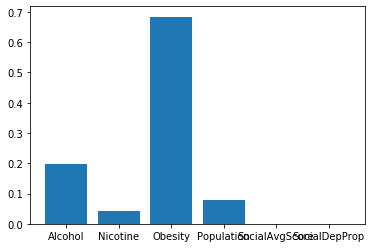

In [155]:
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = train_frame.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.figure
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [19]:
def one_lag_model_explain(index):
    test=megatraining.iloc[index]
    test=test.to_frame().transpose()
    test.dropna(axis=1)
    Dementia_cols = [col for col in test.columns if 'DementiaDiagnosis' in col]
    Alcohol_cols = [col for col in test.columns if 'Alcohol' in col]
    Nicotine_cols = [col for col in test.columns if 'Nicotine' in col]
    Obesity_cols = [col for col in test.columns if 'Obesity' in col]
    Population_cols = [col for col in test.columns if 'Population' in col]
    Social_cols = [col for col in test.columns if 'Social' in col]
    #create data frame on Dementia as the base
    base_dict={}
    for col in Dementia_cols:
        base_dict[col.split('.')[1]]=test[col].values.tolist()[0]
    train_frame=pd.DataFrame.from_dict(base_dict, orient='index',columns=['DementiaDiag'])
    train_frame['Alcohol']=[np.nan]*train_frame.shape[0]
    train_frame['Nicotine']=[np.nan]*train_frame.shape[0]
    train_frame['Obesity']=[np.nan]*train_frame.shape[0]
    train_frame['Population']=[np.nan]*train_frame.shape[0]
    train_frame['SocialDepr']=[np.nan]*train_frame.shape[0]
    for col in Alcohol_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Nicotine_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Obesity_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Population_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp+'-06-01' in train_frame.index.values:
            train_frame.at[time_stamp+'-06-01',col_name]=test[col].values.tolist()[0]
    
    train_frame.iloc[0,5]=test['Social.IDAOPI_avg_score_2015'].values.tolist()[0]
    train_frame.iloc[-8,5]=test['Social.IDAOPI_avg_score_2019'].values.tolist()[0]
#     train_frame['SocialAvgScore']=[(test['Social.IDAOPI_avg_score_2019']-test['Social.IDAOPI_avg_score_2015']).values.tolist()[0]]*train_frame.shape[0]
#     train_frame['SocialDepProp']=[(test['Social.IDAOPI_most_deprived_proportion_2019']-test['Social.IDAOPI_most_deprived_proportion_2015']).values.tolist()[0]]*train_frame.shape[0]
    train_frame=train_frame.set_index(pd.to_datetime(train_frame.index,infer_datetime_format=True))
    
    if train_frame.isnull().sum(axis=0)['DementiaDiag']>train_frame.shape[0]-2:
        train_frame.drop(columns=['DementiaDiag'])
    else:      
        train_frame['DementiaDiag']=train_frame['DementiaDiag'].interpolate(method='linear',limit_direction="both")
        
    if train_frame.isnull().sum(axis=0)['Alcohol']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Alcohol'])
    else:      
        train_frame['Alcohol']=train_frame['Alcohol'].interpolate(method='linear',limit_direction="both")
        
    if train_frame.isnull().sum(axis=0)['Nicotine']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Nicotine'])
    else:
        train_frame['Nicotine']=train_frame['Nicotine'].interpolate(method='linear',limit_direction="both")
        
    if train_frame.isnull().sum(axis=0)['Obesity']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Obesity'])
    else:
        train_frame['Obesity']=train_frame['Obesity'].interpolate(method='linear',limit_direction="both")
    
    if train_frame.isnull().sum(axis=0)['Population']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Population'])
    else:
        train_frame['Population']=train_frame['Population'].interpolate(method='linear',limit_direction="both")
    
    if train_frame.isnull().sum(axis=0)['SocialDepr']>train_frame.shape[0]-2:
        train_frame.drop(columns=['SocialDepr'])
    else:
        train_frame['SocialDepr']=train_frame['SocialDepr'].interpolate(method='linear',limit_direction="both")
        
    #first shift target 1
    train_frame=train_frame.dropna(axis=1)
    train_frame['y']=train_frame['DementiaDiag'].shift(1)
    train_frame=train_frame.drop(columns=['DementiaDiag'])
    train_frame=train_frame.dropna(axis=0)
    scaler = StandardScaler()
    array=train_frame.values
    array=scaler.fit_transform(array)
    X = array[:,0:-1]
    y = array[:,-1]
    # fit random forest model
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    model.fit(X, y)
    # show importance scores
    print(model.feature_importances_)
    # plot importance scores
    names = train_frame.columns.values[0:-1]
    ticks = [i for i in range(len(names))]
    plt.figure()
    pyplot.bar(ticks, model.feature_importances_)
    pyplot.xticks(ticks, names)
    pyplot.title('feature importance plot for {}'.format(megatraining['Unnamed: 0'][index]))
    pyplot.show()
    
    

[0.03416716 0.1043056  0.28507006 0.0822021  0.49425509]


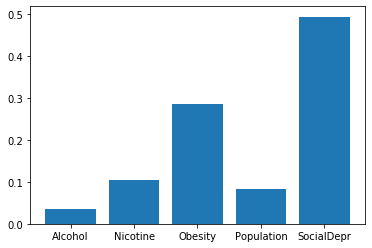

In [267]:
one_lag_model_explain(177)

In [14]:
def one_lag_model_explain_shap(index):
    test=megatraining.iloc[index]
    test=test.to_frame().transpose()
    test.dropna(axis=1)
    Dementia_cols = [col for col in test.columns if 'DementiaDiagnosis' in col]
    Alcohol_cols = [col for col in test.columns if 'Alcohol' in col]
    Nicotine_cols = [col for col in test.columns if 'Nicotine' in col]
    Obesity_cols = [col for col in test.columns if 'Obesity' in col]
    Population_cols = [col for col in test.columns if 'Population' in col]
    Social_cols = [col for col in test.columns if 'Social' in col]
    #create data frame on Dementia as the base
    base_dict={}
    for col in Dementia_cols:
        base_dict[col.split('.')[1]]=test[col].values.tolist()[0]
    train_frame=pd.DataFrame.from_dict(base_dict, orient='index',columns=['DementiaDiag'])
    train_frame['Alcohol']=[np.nan]*train_frame.shape[0]
    train_frame['Nicotine']=[np.nan]*train_frame.shape[0]
    train_frame['Obesity']=[np.nan]*train_frame.shape[0]
    train_frame['Population']=[np.nan]*train_frame.shape[0]
    train_frame['SocialDepr']=[np.nan]*train_frame.shape[0]
    for col in Alcohol_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Nicotine_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Obesity_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Population_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp+'-06-01' in train_frame.index.values:
            train_frame.at[time_stamp+'-06-01',col_name]=test[col].values.tolist()[0]
    
    train_frame.iloc[0,5]=test['Social.IDAOPI_avg_score_2015'].values.tolist()[0]
    train_frame.iloc[-8,5]=test['Social.IDAOPI_avg_score_2019'].values.tolist()[0]
#     train_frame['SocialAvgScore']=[(test['Social.IDAOPI_avg_score_2019']-test['Social.IDAOPI_avg_score_2015']).values.tolist()[0]]*train_frame.shape[0]
#     train_frame['SocialDepProp']=[(test['Social.IDAOPI_most_deprived_proportion_2019']-test['Social.IDAOPI_most_deprived_proportion_2015']).values.tolist()[0]]*train_frame.shape[0]
    train_frame=train_frame.set_index(pd.to_datetime(train_frame.index,infer_datetime_format=True))
    
    if train_frame.isnull().sum(axis=0)['DementiaDiag']>train_frame.shape[0]-2:
        train_frame.drop(columns=['DementiaDiag'])
    else:      
        train_frame['DementiaDiag']=train_frame['DementiaDiag'].interpolate(method='linear',limit_direction="both")
        
    if train_frame.isnull().sum(axis=0)['Alcohol']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Alcohol'])
    else:      
        train_frame['Alcohol']=train_frame['Alcohol'].interpolate(method='linear',limit_direction="both")
        
    if train_frame.isnull().sum(axis=0)['Nicotine']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Nicotine'])
    else:
        train_frame['Nicotine']=train_frame['Nicotine'].interpolate(method='linear',limit_direction="both")
        
    if train_frame.isnull().sum(axis=0)['Obesity']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Obesity'])
    else:
        train_frame['Obesity']=train_frame['Obesity'].interpolate(method='linear',limit_direction="both")
    
    if train_frame.isnull().sum(axis=0)['Population']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Population'])
    else:
        train_frame['Population']=train_frame['Population'].interpolate(method='linear',limit_direction="both")
    
    if train_frame.isnull().sum(axis=0)['SocialDepr']>train_frame.shape[0]-2:
        train_frame.drop(columns=['SocialDepr'])
    else:
        train_frame['SocialDepr']=train_frame['SocialDepr'].interpolate(method='linear',limit_direction="both")
        
    #first shift target 1
    train_frame=train_frame.dropna(axis=1)
    train_frame['y']=train_frame['DementiaDiag'].shift(1)
    train_frame=train_frame.drop(columns=['DementiaDiag'])
    train_frame=train_frame.dropna(axis=0)
    y=train_frame.pop('y')
    X=train_frame
#     print(X)
    # fit random forest model
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    model.fit(X, y)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X)
    

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


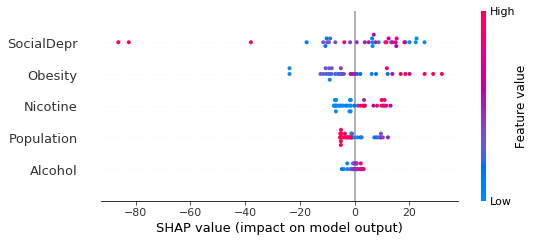

In [284]:
one_lag_model_explain_shap(177)

# Classification model

In [289]:
test=megatraining.iloc[0]
test=test.to_frame().transpose()

In [303]:
def generate_train_frame(df):
    test=df.to_frame().transpose()
    test.dropna(axis=1)
    Dementia_cols = [col for col in test.columns if 'DementiaDiagnosis' in col]
    Alcohol_cols = [col for col in test.columns if 'Alcohol' in col]
    Nicotine_cols = [col for col in test.columns if 'Nicotine' in col]
    Obesity_cols = [col for col in test.columns if 'Obesity' in col]
    Population_cols = [col for col in test.columns if 'Population' in col]
    Social_cols = [col for col in test.columns if 'Social' in col]
    #create data frame on Dementia as the base
    base_dict={}
    for col in Dementia_cols:
        base_dict[col.split('.')[1]]=test[col].values.tolist()[0]
    train_frame=pd.DataFrame.from_dict(base_dict, orient='index',columns=['DementiaDiag'])
    train_frame['Alcohol']=[np.nan]*train_frame.shape[0]
    train_frame['Nicotine']=[np.nan]*train_frame.shape[0]
    train_frame['Obesity']=[np.nan]*train_frame.shape[0]
    train_frame['Population']=[np.nan]*train_frame.shape[0]
    train_frame['SocialDepr']=[np.nan]*train_frame.shape[0]
    for col in Alcohol_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Nicotine_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Obesity_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp in train_frame.index.values:
            train_frame.at[time_stamp,col_name]=test[col].values.tolist()[0]
    for col in Population_cols:
        col_name,time_stamp=col.split('.')
        if time_stamp+'-06-01' in train_frame.index.values:
            train_frame.at[time_stamp+'-06-01',col_name]=test[col].values.tolist()[0]

    train_frame.iloc[0,5]=test['Social.IDAOPI_avg_score_2015'].values.tolist()[0]
    train_frame.iloc[-8,5]=test['Social.IDAOPI_avg_score_2019'].values.tolist()[0]
    #     train_frame['SocialAvgScore']=[(test['Social.IDAOPI_avg_score_2019']-test['Social.IDAOPI_avg_score_2015']).values.tolist()[0]]*train_frame.shape[0]
    #     train_frame['SocialDepProp']=[(test['Social.IDAOPI_most_deprived_proportion_2019']-test['Social.IDAOPI_most_deprived_proportion_2015']).values.tolist()[0]]*train_frame.shape[0]
    train_frame=train_frame.set_index(pd.to_datetime(train_frame.index,infer_datetime_format=True))

    if train_frame.isnull().sum(axis=0)['DementiaDiag']>train_frame.shape[0]-2:
        train_frame.drop(columns=['DementiaDiag'])
    else:      
        train_frame['DementiaDiag']=train_frame['DementiaDiag'].interpolate(method='linear',limit_direction="both")

    if train_frame.isnull().sum(axis=0)['Alcohol']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Alcohol'])
    else:      
        train_frame['Alcohol']=train_frame['Alcohol'].interpolate(method='linear',limit_direction="both")

    if train_frame.isnull().sum(axis=0)['Nicotine']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Nicotine'])
    else:
        train_frame['Nicotine']=train_frame['Nicotine'].interpolate(method='linear',limit_direction="both")

    if train_frame.isnull().sum(axis=0)['Obesity']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Obesity'])
    else:
        train_frame['Obesity']=train_frame['Obesity'].interpolate(method='linear',limit_direction="both")

    if train_frame.isnull().sum(axis=0)['Population']>train_frame.shape[0]-2:
        train_frame.drop(columns=['Population'])
    else:
        train_frame['Population']=train_frame['Population'].interpolate(method='linear',limit_direction="both")

    if train_frame.isnull().sum(axis=0)['SocialDepr']>train_frame.shape[0]-2:
        train_frame.drop(columns=['SocialDepr'])
    else:
        train_frame['SocialDepr']=train_frame['SocialDepr'].interpolate(method='linear',limit_direction="both")
    return train_frame

In [307]:
train_df=generate_train_frame(megatraining.iloc[0])

In [309]:
train_df['y']=train_df['DementiaDiag'].shift(1)

In [316]:
train_df=train_df.drop(columns=['DementiaDiag'])

In [319]:
train_df['Alcohol_diff']=train_df['Alcohol'].diff()
train_df['Obesity_diff']=train_df['Obesity'].diff()
train_df['Nicotine_diff']=train_df['Nicotine'].diff()

In [321]:
train_df['y_diff']=train_df['y'].diff()

In [325]:
train_df=train_df.dropna(axis=0)

In [327]:
y_class=[]
for value in train_df.y_diff:
    if value>0:
        y_class.append(1)
    else:
        y_class.append(0)

In [330]:
train_df['y_class']=y_class
train_df=train_df.drop(columns=['y_diff','y'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [334]:
y=train_df.pop('y_class')
X=train_df

[0.10636995 0.13063175 0.27889053 0.04875797 0.12948081 0.08440217
 0.15832803 0.06313879]
7


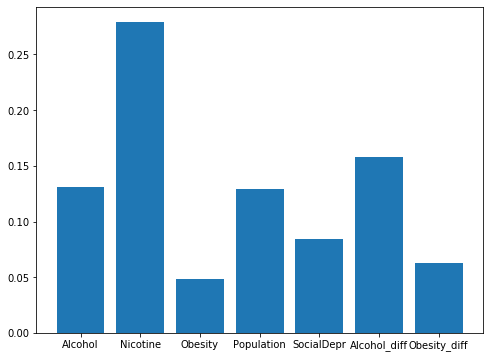

In [344]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)
# show importance scores
# plot importance scores
names = train_df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.figure(figsize=(8, 6))
pyplot.bar(ticks, rfc.feature_importances_[1:])
pyplot.xticks(ticks, names)
pyplot.show()
    

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


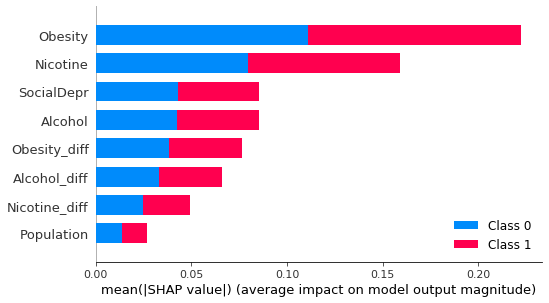

In [345]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)